# 2019 Bay Wheels Ride Data Exploration 
## by Clayton Coelho

## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#preli)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
- [Cleaning Data](#cleaning)
- [Analyzing and Visualizing Data](#analyzing)

<a id='intro'></a>
## Introduction

Bay Wheels (previously known as Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

In June 2019, after Motivate's acquisition by Lyft, the system rebranded to Bay Wheels and dropped the Ford naming. Along with the rebranding, Bay Wheels also deployed a new generation of bicycles which can use bikeshare docks and also operate in a dockless mode, in which customers can lock the bike to a bicycle rack with a built-in lock. In July 2019, defects with the batteries for the electric bicycle models caused Lyft to withdraw all electric-assist models until December 2019, when electric-assist service relaunched with updated hardware.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In this project I will analyze data about 2019 and evaluate trends and behaviors.

See the data [here](https://www.lyft.com/bikes/bay-wheels/system-data).

<a id='preli'></a>
## Preliminary Wrangling

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import zipfile
import glob

%matplotlib inline

<a id='gathering'></a>
## Gathering Data

In [14]:
# Download files zip only 2019

path_save = './data/' # Path local 

# Loop for download and extract files csv
for month in range(1, 13):
    # Set url by month
    if month < 5:
        url = 'https://s3.amazonaws.com/baywheels-data/2019{:02d}-fordgobike-tripdata.csv.zip'.format(month)
    else:
        url = 'https://s3.amazonaws.com/baywheels-data/2019{:02d}-baywheels-tripdata.csv.zip'.format(month)
        
    filename_zip = url.split("/")[-1] # Get filename of file zip
    response = requests.get(url) # Requests url
    
    # Save zip file in local path
    with open(path_save + filename_zip, "wb") as file:
        file.write(response.content)
    
    # Unzip file in local path e remove origin file zip
    zip_ref = zipfile.ZipFile(path_save + filename_zip) # Create zipfile object
    zip_ref.extractall(path_save) # Extract file to dir
    zip_ref.close() # Close file
    os.remove(path_save + filename_zip) # delete zipped file

In [26]:
# Import all files csv in DataFrame

extension = 'csv' # Set the extension to csv

# Create list with filenames csv
all_filenames = [i for i in glob.glob(path_save + '*.{}'.format(extension))]

# Combine all files in the list of Dataframe and concatenate
df_baywheels = pd.concat([pd.read_csv(f, low_memory=False, index_col=None, header=0) for f in all_filenames ], axis=0, ignore_index=True)

<a id='assessing'></a>
## Assessing Data

In [28]:
# Visualize info from dataset
df_baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [30]:
# Visualize the first five rows
df_baywheels.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN


In [42]:
# Verify statistics values
df_baywheels.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,2506983.0,807.648330,1974.713981,60.000000,359.000000,571.000000,887.000000,912110.00
start_station_id,2426249.0,146.504749,122.317102,3.000000,47.000000,105.000000,243.000000,498.00
start_station_latitude,2506983.0,37.765064,0.136370,0.000000,37.769305,37.780526,37.795393,45.51
start_station_longitude,2506983.0,-122.349919,0.308965,-122.514299,-122.413004,-122.398285,-122.291415,0.00
end_station_id,2424081.0,142.704424,121.429649,3.000000,43.000000,101.000000,239.000000,498.00
end_station_latitude,2506983.0,37.764219,0.239289,0.000000,37.770030,37.780760,37.795873,45.51
end_station_longitude,2506983.0,-122.345908,0.708042,-122.514287,-122.411726,-122.398113,-122.293400,0.00
bike_id,2506983.0,27898.327162,114606.651187,4.000000,1952.000000,4420.000000,9682.000000,999941.00


In [31]:
# Verify values nulls
df_baywheels.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [33]:
# Verify values nulls in percent
(df_baywheels.isnull().sum() / df_baywheels.shape[0]) * 100

duration_sec                0.000000
start_time                  0.000000
end_time                    0.000000
start_station_id            3.220365
start_station_name          3.196392
start_station_latitude      0.000000
start_station_longitude     0.000000
end_station_id              3.306843
end_station_name            3.284825
end_station_latitude        0.000000
end_station_longitude       0.000000
bike_id                     0.000000
user_type                   0.000000
bike_share_for_all_trip     9.703257
rental_access_method       95.179943
dtype: float64

In [37]:
# Verify values in column
df_baywheels['start_station_id'].value_counts()

58.0     45058
81.0     42962
30.0     40302
15.0     39016
67.0     36576
         ...  
429.0        4
329.0        3
444.0        3
484.0        2
420.0        1
Name: start_station_id, Length: 436, dtype: int64

In [38]:
# Verify values in column
df_baywheels['start_station_name'].value_counts()

Market St at 10th St                                         45058
Berry St at 4th St                                           42962
San Francisco Caltrain (Townsend St at 4th St)               40302
San Francisco Ferry Building (Harry Bridges Plaza)           39016
San Francisco Caltrain Station 2  (Townsend St at 4th St)    36576
                                                             ...  
Prototype Lab                                                    4
San Jose Depot                                                   3
Mercado Way at Sierra Rd                                         3
Philly Demo                                                      2
SF Test Station                                                  1
Name: start_station_name, Length: 446, dtype: int64

In [43]:
# Verify values in column
df_baywheels['end_station_id'].value_counts()

67.0     52146
30.0     50943
15.0     48180
21.0     47886
58.0     44284
         ...  
428.0        4
444.0        4
484.0        2
329.0        2
65.0         1
Name: end_station_id, Length: 436, dtype: int64

In [44]:
# Verify values in column
df_baywheels['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    52146
San Francisco Caltrain (Townsend St at 4th St)               50943
San Francisco Ferry Building (Harry Bridges Plaza)           48180
Montgomery St BART Station (Market St at 2nd St)             47886
Market St at 10th St                                         44284
                                                             ...  
Howard workshop - Station in a Box                               4
Prototype Lab                                                    4
Philly Demo                                                      2
San Jose Depot                                                   2
Emeryville Depot                                                 1
Name: end_station_name, Length: 446, dtype: int64

In [39]:
# Verify values in column
df_baywheels['user_type'].value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [40]:
# Verify values in column
df_baywheels['bike_share_for_all_trip'].value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [41]:
# Verify values in column
df_baywheels['bike_id'].value_counts()

3135      912
3146      911
3569      889
3249      882
1502      882
         ... 
3973        1
655034      1
92          1
3214        1
6271        1
Name: bike_id, Length: 11070, dtype: int64

In [45]:
# Verify values in column
df_baywheels['rental_access_method'].value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [214]:
df_baywheels['duration_sec'].describe(percentiles=[.98])

count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
50%      5.710000e+02
98%      2.674000e+03
max      9.121100e+05
Name: duration_sec, dtype: float64

### Quality Issues
- Erroneous datatypes in `start_time`, `end_time` and `user_type`.
- Nulls values in columns in `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `bike_share_for_all_trip` and `rental_access_method`.
- Outliers found in the column `duration_sec`.

### Tidiness Issues
- Individual columns are missing for **hour** values, **weekday name**, **month name** and **duration in minute**.
- Dataset not ordered by date.
- Columns that will not be used

<a id='cleaning'></a>
## Cleaning Data

In [353]:
# Create copy of dataset
df_baywheels_clean = df_baywheels.copy()

### Quality Issues
#### Nulls values in columns in `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `bike_share_for_all_trip` and `rental_access_method`.

#####  Define
Delete columns `start_station_id`, `end_station_id` and `bike_share_for_all_trip` because I will not use them.

Delete column `rental_access_method` because it have 95% of values as null.

Delete rows in `start_station_name` and `end_station_name` because it only have 3% of values as null.

##### Code

In [354]:
# Drop columns "start_station_id", "end_station_id", "bike_share_for_all_trip" and "rental_access_method"
df_baywheels_clean = df_baywheels_clean.drop(['start_station_id', 'end_station_id', 'bike_share_for_all_trip', 'rental_access_method'], axis=1)

In [355]:
# Drop rows in start_station_name and end_station_name
df_baywheels_clean = df_baywheels_clean[~((df_baywheels_clean['start_station_name'].isnull()) | df_baywheels_clean['end_station_name'].isnull())]

##### Test

In [356]:
# Verify nulls values
df_baywheels_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [357]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407907 entries, 0 to 2506982
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_name       object 
 4   start_station_latitude   float64
 5   start_station_longitude  float64
 6   end_station_name         object 
 7   end_station_latitude     float64
 8   end_station_longitude    float64
 9   bike_id                  int64  
 10  user_type                object 
dtypes: float64(4), int64(2), object(5)
memory usage: 220.5+ MB


#### Erroneous datatypes in `start_time`, `end_time` and `user_type`.

#####  Define
Set datatype in `start_time` and `end_time` to **datetime**, and in `user_type` to **categorical**.

##### Code

In [358]:
# Set datatype in start_time and end_time to datetime 
df_baywheels_clean['start_time'] = pd.to_datetime(df_baywheels_clean['start_time'])
df_baywheels_clean['end_time'] = pd.to_datetime(df_baywheels_clean['end_time'])

In [359]:
# Set "user_type" as category type
df_baywheels_clean['user_type'] = df_baywheels_clean['user_type'].astype('category')

##### Test

In [360]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407907 entries, 0 to 2506982
Data columns (total 11 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_name         object        
 7   end_station_latitude     float64       
 8   end_station_longitude    float64       
 9   bike_id                  int64         
 10  user_type                category      
dtypes: category(1), datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 204.4+ MB


#### Outliers found in the column `duration_sec`.

#####  Define
Drop rows that are above 98 percentile values.

##### Code

In [361]:
# Drop rows that are above 98 percentile values.
df_baywheels_clean = df_baywheels_clean[~(df_baywheels_clean['duration_sec'] >= df_baywheels_clean['duration_sec'].describe(percentiles=[.98])['98%'])]

##### Test

In [362]:
# Verify describe
df_baywheels_clean['duration_sec'].describe()

count    2.359710e+06
mean     6.648729e+02
std      4.312914e+02
min      6.000000e+01
25%      3.550000e+02
50%      5.600000e+02
75%      8.570000e+02
max      2.640000e+03
Name: duration_sec, dtype: float64

### Tidiness Issues
#### Individual columns are missing for **hour** values, **weekday name**, **month name** and **duration in minute**.

#####  Define
Create columns `start_time_hour`, `end_time_hour`, `time_day_of_week`, `time_month` and `duration_minute`.

##### Code

In [363]:
# Create columns "start_time_hour", "end_time_hour", "time_day_of_week", "time_month", "duration_minute" and "time_week_type"
df_baywheels_clean['start_time_hour'] = df_baywheels_clean['start_time'].dt.hour # Get hour
df_baywheels_clean['end_time_hour'] = df_baywheels_clean['end_time'].dt.hour # Get hour
df_baywheels_clean['time_day_of_week'] = df_baywheels_clean['start_time'].dt.day_name() # Get day of week name
df_baywheels_clean['time_month'] = df_baywheels_clean['start_time'].dt.month_name() # Get month name
df_baywheels_clean['duration_minute'] = df_baywheels_clean['duration_sec'].apply(lambda x: round(x / 60, 2)) # Transform second to minute

In [364]:
# Set "time_week_type" as category type and ordered
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_of_week)
df_baywheels_clean['time_day_of_week'] = df_baywheels_clean['time_day_of_week'].astype(day_of_week_classes)

In [365]:
# Set "time_month" as category type and ordered
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_name_classes = pd.api.types.CategoricalDtype(ordered = True, categories = month_name)
df_baywheels_clean['time_month'] = df_baywheels_clean['time_month'].astype(month_name_classes)

##### Test

In [366]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359710 entries, 3 to 2506982
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_name         object        
 7   end_station_latitude     float64       
 8   end_station_longitude    float64       
 9   bike_id                  int64         
 10  user_type                category      
 11  start_time_hour          int64         
 12  end_time_hour            int64         
 13  time_day_of_week         category      
 14  time_month               category      
 15  duration_minute          float64       
dtypes: category(3), datetime64[ns](2), float64(5), int64(4), object(2)
memor

In [367]:
# Verify values in column
df_baywheels_clean['start_time_hour'].value_counts()

17    284277
8     270658
18    222945
9     207776
16    181175
7     136951
19    135980
15    113721
12    103602
10    102458
13    100840
14     97217
11     94158
20     86195
21     60732
6      51316
22     41254
23     24297
0      13323
5      12669
1       7765
2       4934
4       3113
3       2354
Name: start_time_hour, dtype: int64

In [368]:
# Verify values in column
df_baywheels_clean['end_time_hour'].value_counts()

17    273738
8     253882
18    240422
9     231968
16    167255
19    148952
7     114720
10    111240
15    107045
12    102863
13    101817
14     96652
20     93560
11     91643
21     64527
22     44811
6      43109
23     26932
0      14704
5      10612
1       8200
2       5655
4       3021
3       2382
Name: end_time_hour, dtype: int64

In [369]:
# Verify values in column
df_baywheels_clean['time_day_of_week'].value_counts()

Thursday     406452
Tuesday      405317
Wednesday    396234
Friday       376000
Monday       374796
Saturday     210503
Sunday       190408
Name: time_day_of_week, dtype: int64

In [370]:
# Verify values in column
df_baywheels_clean['time_month'].value_counts()

March        249922
October      235380
April        234209
September    213155
August       206042
January      188058
June         184976
July         183800
November     181269
February     180336
May          178972
December     123591
Name: time_month, dtype: int64

In [371]:
# Verify values in column
df_baywheels_clean['duration_minute'].value_counts()

5.65     3179
6.20     3156
6.17     3146
5.40     3139
6.38     3132
         ... 
43.08      31
42.98      29
43.95      28
43.98      23
1.00        4
Name: duration_minute, Length: 2581, dtype: int64

#### Dataset not ordered by date.

#####  Define
Sort dataset by column `start_time`.

##### Code

In [372]:
# Sorted dateset by column "start_time"
df_baywheels_clean = df_baywheels_clean.sort_values(by=['start_time']).reset_index(drop=True)

##### Test

In [373]:
# Verify dataset
df_baywheels_clean

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_hour,end_time_hour,time_day_of_week,time_month,duration_minute
0,226,2019-01-01 00:07:10.576,2019-01-01 00:10:57.196,Downtown Berkeley BART,37.870139,-122.268422,Fulton St at Bancroft Way,37.867789,-122.265896,5117,Customer,0,0,Tuesday,January,3.77
1,1767,2019-01-01 00:08:39.659,2019-01-01 00:38:06.848,Steuart St at Market St,37.794130,-122.394430,Jackson Playground,37.765026,-122.398773,1705,Customer,0,0,Tuesday,January,29.45
2,182,2019-01-01 00:09:56.211,2019-01-01 00:12:58.748,Telegraph Ave at Carleton St,37.862320,-122.258801,Haste St at Telegraph Ave,37.866043,-122.258804,4621,Subscriber,0,0,Tuesday,January,3.03
3,565,2019-01-01 00:11:03.441,2019-01-01 00:20:29.268,Telegraph Ave at Carleton St,37.862320,-122.258801,Bancroft Way at College Ave,37.869360,-122.254337,4783,Subscriber,0,0,Tuesday,January,9.42
4,710,2019-01-01 00:14:48.398,2019-01-01 00:26:38.421,Lake Merritt BART Station,37.797320,-122.265320,24th St at Market St,37.816060,-122.278244,4892,Customer,0,0,Tuesday,January,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359705,1275,2019-12-31 23:56:05.939,2020-01-01 00:17:21.935,Cruise Terminal at Pier 27,37.804223,-122.401643,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,9829,Customer,23,0,Tuesday,December,21.25
2359706,782,2019-12-31 23:56:34.462,2020-01-01 00:09:36.705,The Embarcadero at Steuart St,37.791464,-122.391034,The Embarcadero at Steuart St,37.791464,-122.391034,11683,Customer,23,0,Tuesday,December,13.03
2359707,781,2019-12-31 23:56:40.324,2020-01-01 00:09:41.545,The Embarcadero at Steuart St,37.791464,-122.391034,The Embarcadero at Steuart St,37.791464,-122.391034,11020,Customer,23,0,Tuesday,December,13.02
2359708,185,2019-12-31 23:57:01.551,2020-01-01 00:00:07.494,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,Market St at Franklin St,37.773793,-122.421239,12734,Customer,23,0,Tuesday,December,3.08


In [374]:
# Verify Info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359710 entries, 0 to 2359709
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_name         object        
 7   end_station_latitude     float64       
 8   end_station_longitude    float64       
 9   bike_id                  int64         
 10  user_type                category      
 11  start_time_hour          int64         
 12  end_time_hour            int64         
 13  time_day_of_week         category      
 14  time_month               category      
 15  duration_minute          float64       
dtypes: category(3), datetime64[ns](2), float64(5), int64(4), object(2)
memor

#### Columns that will not be used.

#####  Define
Drop columns `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude` and `bike_id`.

##### Code

In [375]:
# Drop columns "start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude" and "bike_id"
df_baywheels_clean = df_baywheels_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id'], axis=1)

##### Test

In [376]:
# Verify Info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359710 entries, 0 to 2359709
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   user_type           category      
 6   start_time_hour     int64         
 7   end_time_hour       int64         
 8   time_day_of_week    category      
 9   time_month          category      
 10  duration_minute     float64       
dtypes: category(3), datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 150.8+ MB


### Final Dataset

In [377]:
# Copy de final dataset
df_baywheels_final = df_baywheels_clean.copy()

In [378]:
# Store final dateset
df_baywheels_final.to_csv('./data/final/baywheels_final.csv', encoding='utf-8', index=False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data

### What is the structure of your dataset?

The final (cleaned) dataset has 2300000+ bike rides that happen in 2019 in the San Francisco Bay Area and has 11 columns to be explored. The dataset contained features about:
- duration_sec:
    - How long the trip took in seconds.
- duration_minute:
    - How long the trip took in minute.
- start_time:
    - Start datetime for the bike rides.
- end_time:
    - End datetime for the bike rides.
- start_station_name:
    - Start station name.
- end_station_name:
    - End station name.
- user_type:
    - type of users
- start_time_hour:
    - Start hour for the bike rides.
- end_time_hour:
    - End hour for the bike rides.
- time_day_of_week:
    - Start day of week for the bike rides.
- time_month:
    - Start month for the bike rides.

### What is/are the main feature(s) of interest in your dataset?

I am interested in exploring the bike trip duration and quantity in relation to the features in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the `duration_minute`, `start_time`, `user_type`, `start_time_hour`, `time_day_of_week` and `time_month`.

## Univariate Exploration

**I'll start by looking at the distribution of the main variable of interest: `duration_minute`.**

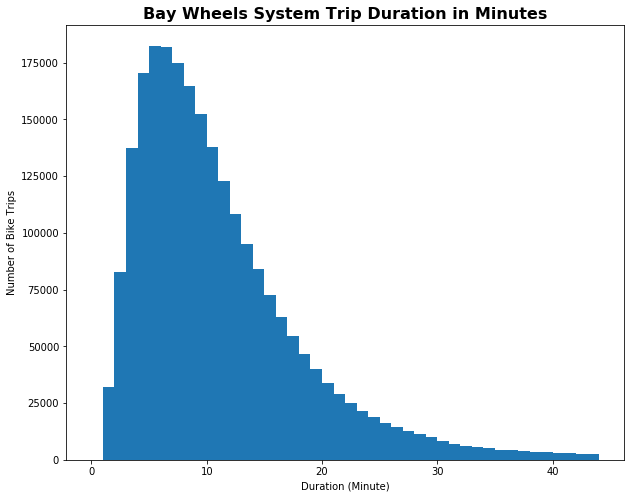

In [276]:
# Duration of the bike rides in minutes
plt.figure(figsize=(10, 8))
binsize = 1
bins = np.arange(0, df_baywheels_final['duration_minute'].max() + binsize, binsize)

plt.hist(data = df_baywheels_final, x = 'duration_minute', bins = bins);

plt.title("Bay Wheels System Trip Duration in Minutes", fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minute)')
plt.ylabel('Number of Bike Trips');

We observed that it formed a graph with positively skewed, where the majority of the trips has duration between 5 and 10 minutes.

**Now I'll look to the distribution of datetime features**

In [275]:
# Get palette color
base_color = sb.color_palette()[0]

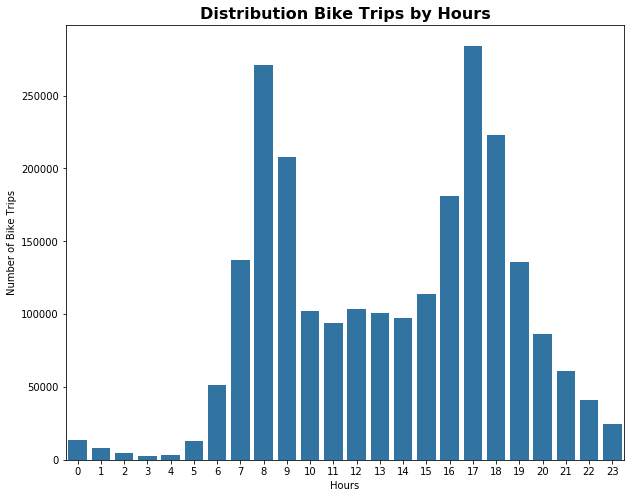

In [277]:
# Plot distribution by "start_time_hour"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'start_time_hour', color = base_color);
plt.title("Distribution Bike Trips by Hours", fontsize=16, fontweight='bold')
plt.xlabel('Hours')
plt.ylabel('Number of Bike Trips');

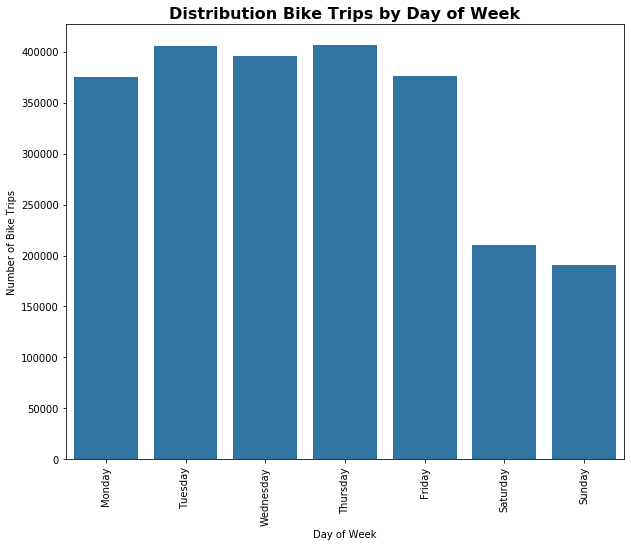

In [278]:
# Plot distribution by "time_day_of_week"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_day_of_week', color = base_color);
plt.xticks(rotation=90)
plt.title("Distribution Bike Trips by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips');

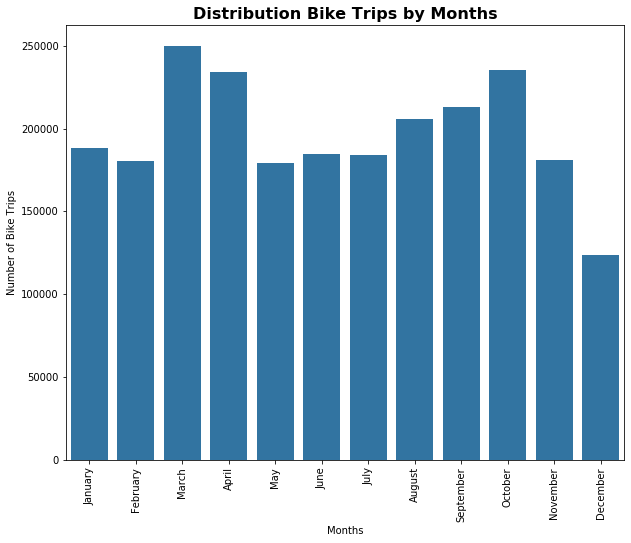

In [279]:
# Plot distribution by "time_month"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_month', color = base_color);
plt.xticks(rotation=90)
plt.title("Distribution Bike Trips by Months", fontsize=16, fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Number of Bike Trips');

In the plot of time variables, some things stand out:
- When we look at each hour, we see peak travel between 7 and 10 and other peak between 16 and 20;
- When we look at the days of the week, we notice that from Monday to Friday we have most trips with peaks between Tuesday and Thursday and the minimums over the weekend.
- When we look at the monthly level, we see that we have peaks in March and April, and then a big down in May, with a tendency of growth in May until another peak in October, and another down in November and December where is the minimum of the year;

**Now I'll look to the distribution of user feature**

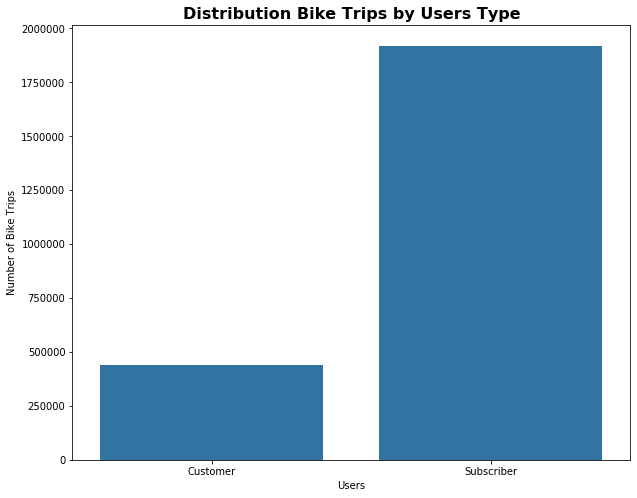

In [281]:
# Plot distribution by "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'user_type', color = base_color);
plt.title("Distribution Bike Trips by Users Type", fontsize=16, fontweight='bold')
plt.xlabel('Users')
plt.ylabel('Number of Bike Trips');

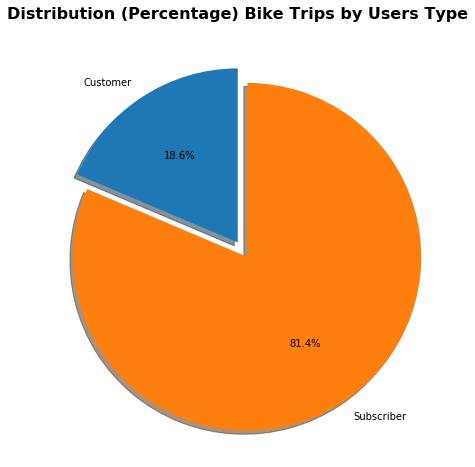

In [297]:
# Pie plot distribution by "user_type"
plt.figure(figsize=(10, 8))
plt.title("Distribution (Percentage) Bike Trips by Users Type", fontsize=16, fontweight='bold')
labels = ['Customer', 'Subscriber']
data = [(df_baywheels_final['user_type'].value_counts(normalize=True) * 100)['Customer'], (df_baywheels_final['user_type'].value_counts(normalize=True) * 100)['Subscriber']]

plt.pie(data, explode=(0, 0.1), labels = labels, autopct='%1.1f%%', shadow=True, startangle=90);

Here we see that more than 80% of the users who use the services are subscribers;

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We note that majority of the trips has duration between 5 and 10 minutes and that from Monday to Friday we have the majority of trips, mainly in the hours of commuting the people moving to start/leave from work.

we also noticed that we have peaks in March and April and the minimum in December.

More than 80% of the users who use the services are subscribers;


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The first plotting out distribution of the trip duration needed adjust. Used .describe() and the bins size to adjust distribution which made the visualization much clearer.

## Bivariate Exploration


**Start by comparing the duration of trips by the other features.**

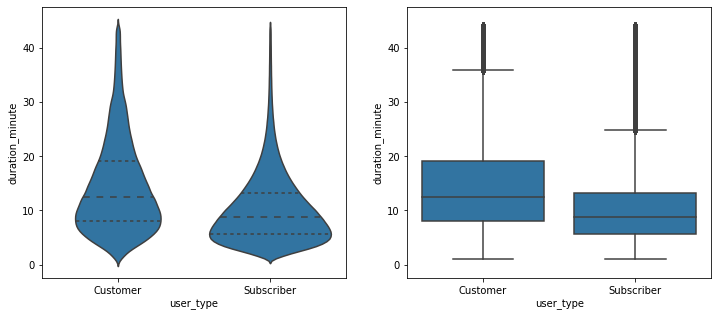

In [303]:
# Bivariate plots of "duration_minute" vs. "user_type"
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_baywheels_final, x = 'user_type', y = 'duration_minute', color = base_color, inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_baywheels_final, x = 'user_type', y = 'duration_minute', color = base_color)

plt.ylim(ax1.get_ylim());


We can see that "Customer" tend to take longer trips than "Subscriber" users.

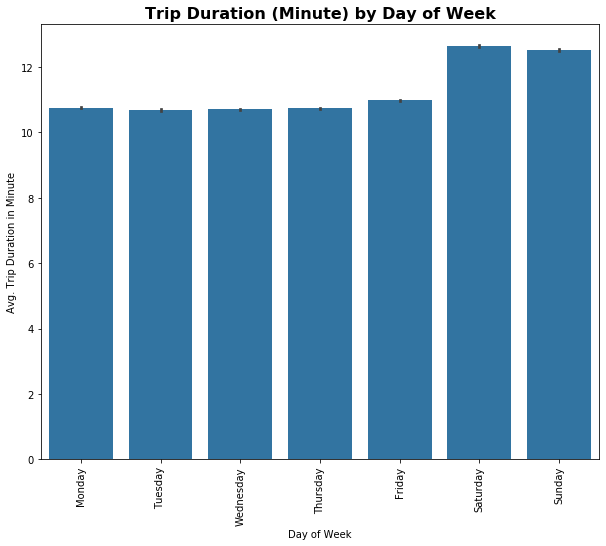

In [305]:
# Bivariate plots of "time_day_of_week" vs "duration_minute"
plt.figure(figsize=(10, 8))
sb.barplot(data=df_baywheels_final, x='time_day_of_week', y='duration_minute', color=base_color);
plt.xticks(rotation=90)
plt.title("Trip Duration (Minute) by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

We observed that during weekends people tend to take longer trips.

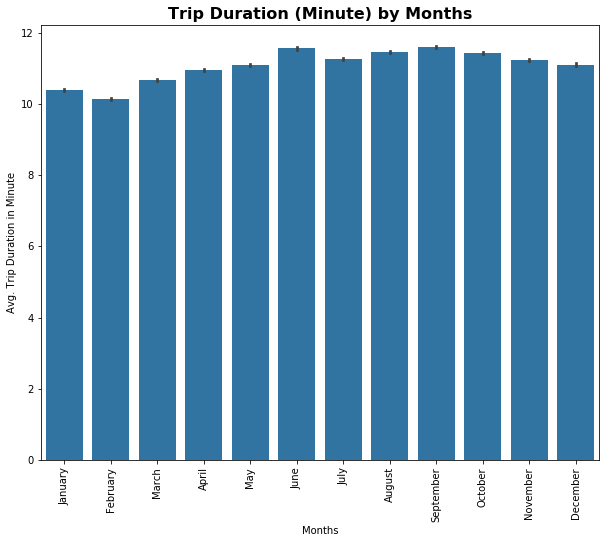

In [306]:
# Bivariate plots of "time_month" vs "duration_minute"
plt.figure(figsize=(10, 8))
sb.barplot(data=df_baywheels_final, x='time_month', y='duration_minute', color=base_color);
plt.xticks(rotation=90)
plt.title("Trip Duration (Minute) by Months", fontsize=16, fontweight='bold')
plt.xlabel('Months');
plt.ylabel('Avg. Trip Duration in Minute');

Here we observe a growing trend in the time of trips during March and peaks in June until October.

**Start by comparing the user_type by the other features.**

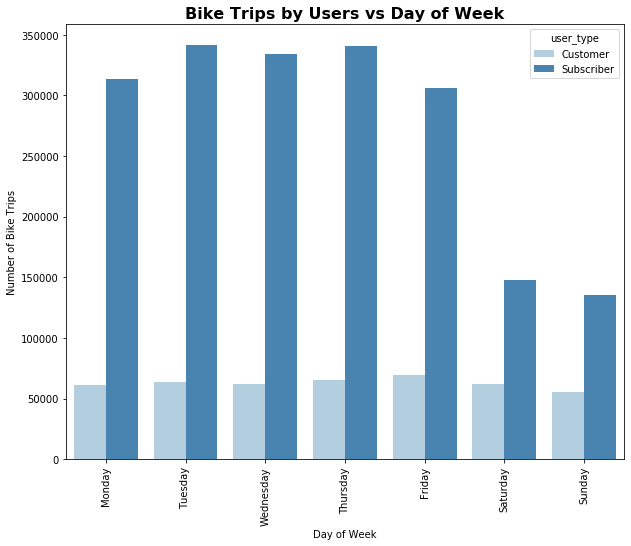

In [309]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_day_of_week', hue = 'user_type', palette = 'Blues')
plt.xticks(rotation=90)
plt.title("Bike Trips by Users vs Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Number of Bike Trips');

Here we see a big down in subscribers on weekends, while user customer has a less impactful down.

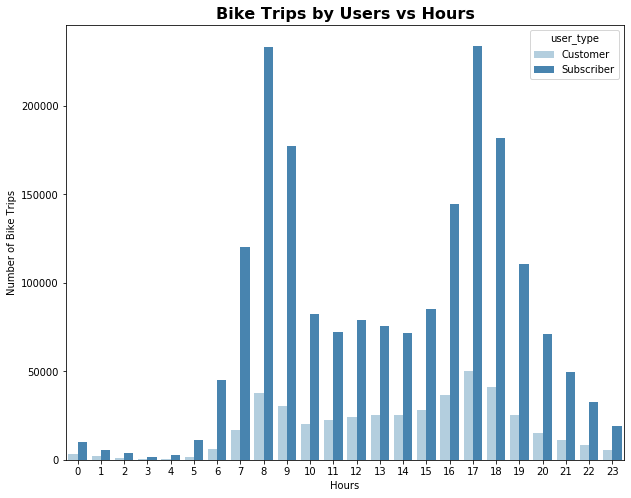

In [311]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'start_time_hour', hue = 'user_type', palette = 'Blues')
plt.title("Bike Trips by Users vs Hours", fontsize=16, fontweight='bold')
plt.xlabel('Hours');
plt.ylabel('Number of Bike Trips');

Here again we notice the trend of increasing trips during the hours of 7 to 10 and from 16 to 20, mainly for "Subscriber" users. The "Customer" users follow the more discreet trend with more trips during the afternoon.

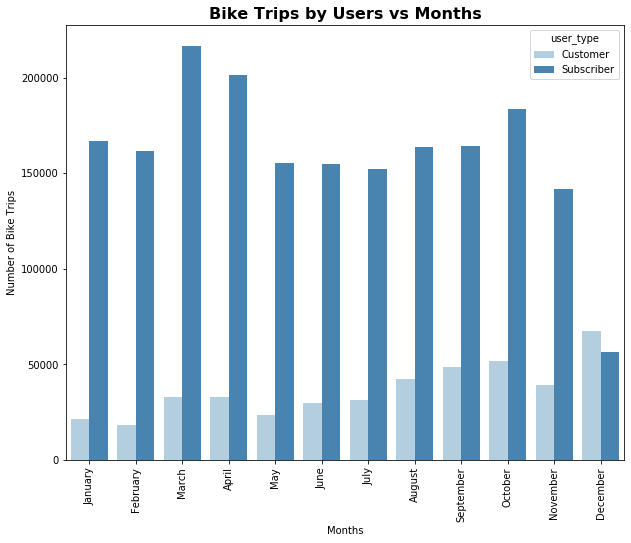

In [312]:
# Bivariate plots of "time_month" vs "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_month', hue = 'user_type', palette = 'Blues')
plt.xticks(rotation=90)
plt.title("Bike Trips by Users vs Months", fontsize=16, fontweight='bold')
plt.xlabel('Months');
plt.ylabel('Number of Bike Trips');

We were able to observe that for users "Subscriber" continues to follow the peak trend in March and April, falling in May and growing again in June until another peak in October and a big down in November and mainly in December.

Users "Customer" it has a slightly different behavior, with growth starting in May and peaking in December, where also for the only time in the year it surpasses the users "Subscriber" in numbers of trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The habit of trips varies a lot between "Subscriber" and "Customer". The "Subscriber" use the bike sharing system during work hours, so most trips took place on weekdays (Monday through Friday) and especially during peak hours (when you work in the morning and leave afternoon), while "Customers" usually have fun in the afternoon or on weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

What drew attention was the question of customer overtaking subscribers in number of trips during December.

## Multivariate Exploration

**I'll compare average trip duration in minute the user_type by the other features.**

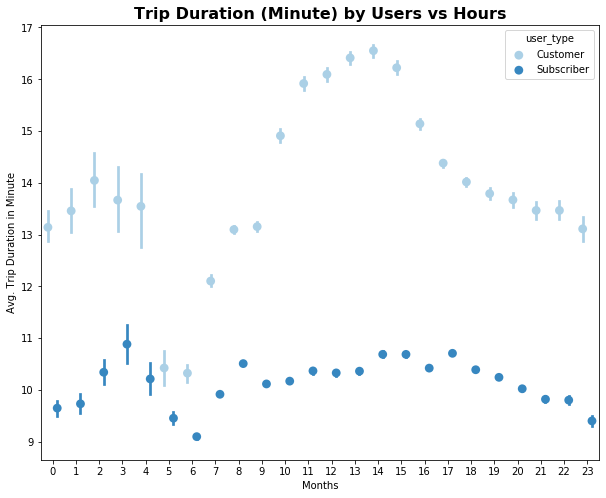

In [315]:
# Multivariate plots of Avg. Duration (minute) by "start_time_hour" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels_final, x = 'start_time_hour', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration (Minute) by Users vs Hours', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xlabel('Hours');
ax.set_yticklabels([],minor = True)
plt.show();

We noticed that the average trip duration of hourly, put the "Customer" with an increase in time during the afternoon hours, while the "Subscriber" has little variation during the day of business hours.

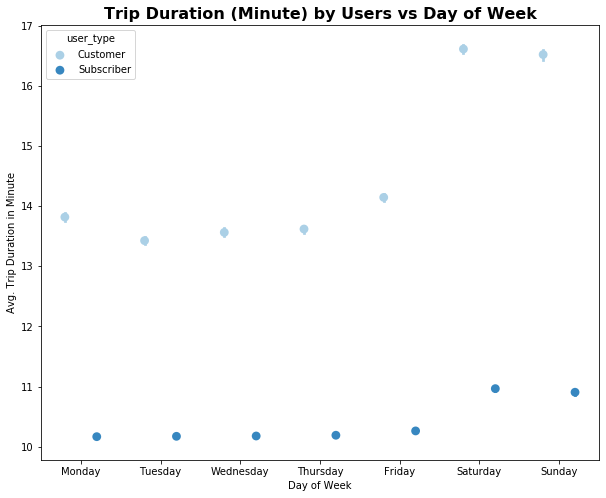

In [316]:
# Multivariate plots of Avg. Duration (minute) by "time_day_of_week" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels_final, x = 'time_day_of_week', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration (Minute) by Users vs Day of Week', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xlabel('Day of Week');
ax.set_yticklabels([],minor = True)
plt.show();

We also observed that the "Customer" spent more time on trips during the weekend, while the "Subscriber" has little volatility for the weekend.

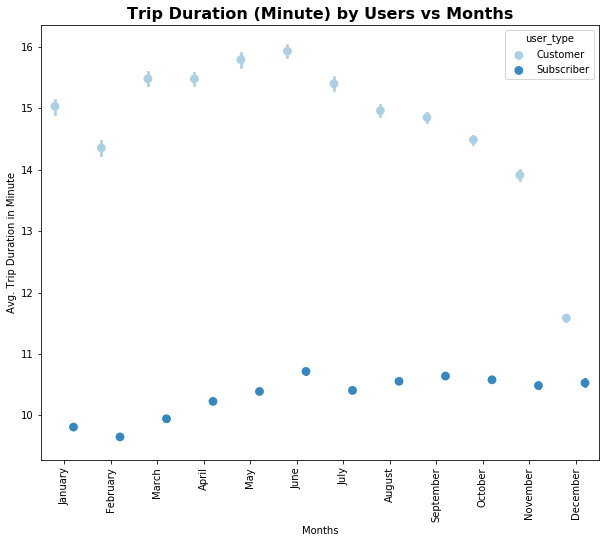

In [318]:
# Multivariate plots of Avg. Duration (minute) by "time_month" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels_final, x = 'time_month', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration (Minute) by Users vs Months', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xlabel('Months');
plt.xticks(rotation=90)
ax.set_yticklabels([],minor = True)
plt.show();

In the monthly, we also observe this volatility of "Customer", and little of "Subscriber".

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We observed that the average trip duration of "Customer" users are higher than that of "Subscriber" users, the plots which shows that the "Customer" has a greater focus on using the service to focus on leisure, while the "Subscriber" has a greater focus on using it to move between home/school to works.

### Were there any interesting or surprising interactions between features?

Surprisingly, the "Customer" has a higher number of trips in December compared to "Subscriber", but there is a big down in the average duration trips in December as well.